In [1]:
SensorNum=1 # Sensor number
WindowWidth=[128,256,512,1024,2048,4096] # Window Width
OverlapArray=[32,32,32,32,32,32] #liding window
#width=1000 # graph width 
#EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
encoding_dim=16
Axis='AccY' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData"
DATE_PATH="/2016-08-15/"
TITLE_PATH="Optim/"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import SGD, Adadelta, Adagrad, Adam, Adamax, RMSprop, Nadam
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
# define rawdata directory
if not os.path.exists(WORKSPACE_PATH+"/raw/"):
    os.makedirs(WORKSPACE_PATH+"/raw/")
RawDataPath=WORKSPACE_PATH+"/raw/"

# define restoring windowdata directory
if not os.path.exists(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+TITLE_PATH+DataName+'/'

# define restoring netowrk model picture's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+DATE_PATH+'/modelPic/'+TITLE_PATH+DataName+'/'

# define restoring graph data's directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+DATE_PATH+'/graph/'+TITLE_PATH+DataName+'/'

# define restoring model paarmeter directory
if not os.path.exists(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'): 
    os.makedirs(WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/')
StudyDataPath=WORKSPACE_PATH+DATE_PATH+'/study/'+TITLE_PATH+DataName+'/'

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成 & Learning**

In [7]:
optimizers = [SGD, Adadelta, Adamax, Adam, Adagrad,  RMSprop, Nadam]
optimArray = ["SGD", "Adadelta","Adamax", "Adam", "Adagrad",  "RMSprop", "Nadam"]

AccY is registed now
Build Complete
(254742,)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 1)
hiden node = 16
-edim=16-Window=128-Overlap=32-SGD
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.2615 - val_loss: 0.2277
Epoch 2/50
0s - loss: 0.2001 - val_loss: 0.1735
Epoch 3/50
0s - loss: 0.1501 - val_loss: 0.1283
Epoch 4/50
0s - loss: 0.1108 - val_loss: 0.0951
Epoch 5/50
0s - loss: 0.0834 - val_loss: 0.0731
Epoch 6/50
0s - loss: 0.0655 - val_loss: 0.0589
Epoch 7/50
0s - loss: 0.0541 - val_loss: 0.0498
Epoch 8/50
0s - loss: 0.0465 - val_loss: 0.0436
Epoch 9/50
0s - loss: 0.0412 - val_loss: 0.0391
Epoch 10/50
0s - loss: 0.0374 - val_loss: 0.0358
Epoch 11/50
0s - loss: 0.0345 - val_loss: 0.0332
Epoch 12/50
0s - loss: 0.0321 - val_loss: 0.0311
Epoch 13/50
0s - loss: 0.0302 - val_loss: 0.0294
Epoch 14/50
0s - loss: 0.0286 - val_loss: 0.0279
Epoch 15/50
0s - loss: 0.0273 - val_loss: 0.0267
Epoch 16/50
0s - loss: 0.0262 - val_loss: 0

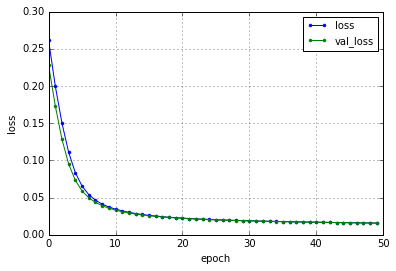

hiden node = 16
-edim=16-Window=128-Overlap=32-Adadelta
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0706 - val_loss: 0.0187
Epoch 2/50
0s - loss: 0.0150 - val_loss: 0.0122
Epoch 3/50
0s - loss: 0.0106 - val_loss: 0.0089
Epoch 4/50
0s - loss: 0.0082 - val_loss: 0.0083
Epoch 5/50
0s - loss: 0.0068 - val_loss: 0.0062
Epoch 6/50
0s - loss: 0.0060 - val_loss: 0.0066
Epoch 7/50
0s - loss: 0.0055 - val_loss: 0.0065
Epoch 8/50
0s - loss: 0.0049 - val_loss: 0.0045
Epoch 9/50
0s - loss: 0.0046 - val_loss: 0.0046
Epoch 10/50
0s - loss: 0.0043 - val_loss: 0.0041
Epoch 11/50
0s - loss: 0.0041 - val_loss: 0.0037
Epoch 12/50
0s - loss: 0.0039 - val_loss: 0.0044
Epoch 13/50
0s - loss: 0.0038 - val_loss: 0.0034
Epoch 14/50
0s - loss: 0.0035 - val_loss: 0.0040
Epoch 15/50
0s - loss: 0.0035 - val_loss: 0.0030
Epoch 16/50
0s - loss: 0.0033 - val_loss: 0.0029
Epoch 17/50
0s - loss: 0.0032 - val_loss: 0.0032
Epoch 18/50
1s - loss: 0.0031 - val_loss: 0.0035
Epoch 19/50
0s - loss: 

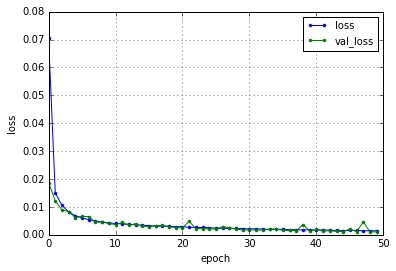

hiden node = 16
-edim=16-Window=128-Overlap=32-Adamax
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0556 - val_loss: 0.0169
Epoch 2/50
1s - loss: 0.0143 - val_loss: 0.0121
Epoch 3/50
1s - loss: 0.0104 - val_loss: 0.0087
Epoch 4/50
0s - loss: 0.0075 - val_loss: 0.0065
Epoch 5/50
0s - loss: 0.0058 - val_loss: 0.0051
Epoch 6/50
1s - loss: 0.0048 - val_loss: 0.0052
Epoch 7/50
1s - loss: 0.0040 - val_loss: 0.0038
Epoch 8/50
1s - loss: 0.0034 - val_loss: 0.0030
Epoch 9/50
1s - loss: 0.0030 - val_loss: 0.0026
Epoch 10/50
1s - loss: 0.0025 - val_loss: 0.0022
Epoch 11/50
1s - loss: 0.0021 - val_loss: 0.0019
Epoch 12/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 13/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 14/50
1s - loss: 0.0013 - val_loss: 0.0011
Epoch 15/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 16/50
0s - loss: 9.7296e-04 - val_loss: 8.8414e-04
Epoch 17/50
0s - loss: 9.3014e-04 - val_loss: 9.4741e-04
Epoch 18/50
1s - loss: 7.9508e-04 - val_loss: 6.7946e-04
E

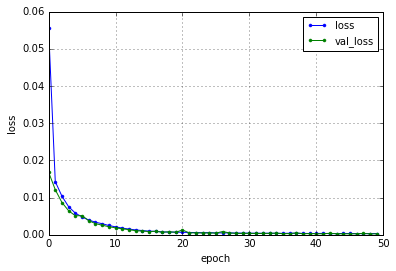

hiden node = 16
-edim=16-Window=128-Overlap=32-Adam
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0533 - val_loss: 0.0135
Epoch 2/50
1s - loss: 0.0107 - val_loss: 0.0081
Epoch 3/50
0s - loss: 0.0070 - val_loss: 0.0062
Epoch 4/50
0s - loss: 0.0053 - val_loss: 0.0052
Epoch 5/50
0s - loss: 0.0042 - val_loss: 0.0037
Epoch 6/50
1s - loss: 0.0036 - val_loss: 0.0033
Epoch 7/50
1s - loss: 0.0030 - val_loss: 0.0027
Epoch 8/50
1s - loss: 0.0026 - val_loss: 0.0025
Epoch 9/50
1s - loss: 0.0022 - val_loss: 0.0019
Epoch 10/50
1s - loss: 0.0020 - val_loss: 0.0017
Epoch 11/50
1s - loss: 0.0017 - val_loss: 0.0024
Epoch 12/50
1s - loss: 0.0016 - val_loss: 0.0012
Epoch 13/50
1s - loss: 0.0013 - val_loss: 0.0011
Epoch 14/50
1s - loss: 0.0012 - val_loss: 9.5978e-04
Epoch 15/50
0s - loss: 0.0010 - val_loss: 0.0014
Epoch 16/50
0s - loss: 9.5759e-04 - val_loss: 0.0010
Epoch 17/50
0s - loss: 8.6993e-04 - val_loss: 0.0017
Epoch 18/50
1s - loss: 8.8458e-04 - val_loss: 6.7153e-04
Epoch 1

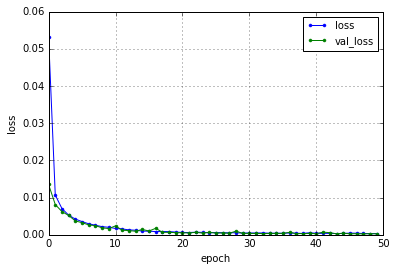

hiden node = 16
-edim=16-Window=128-Overlap=32-Adagrad
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0236 - val_loss: 0.0105
Epoch 2/50
1s - loss: 0.0090 - val_loss: 0.0073
Epoch 3/50
1s - loss: 0.0068 - val_loss: 0.0064
Epoch 4/50
0s - loss: 0.0058 - val_loss: 0.0053
Epoch 5/50
0s - loss: 0.0052 - val_loss: 0.0060
Epoch 6/50
1s - loss: 0.0047 - val_loss: 0.0044
Epoch 7/50
1s - loss: 0.0044 - val_loss: 0.0041
Epoch 8/50
1s - loss: 0.0041 - val_loss: 0.0038
Epoch 9/50
1s - loss: 0.0038 - val_loss: 0.0036
Epoch 10/50
1s - loss: 0.0036 - val_loss: 0.0035
Epoch 11/50
1s - loss: 0.0034 - val_loss: 0.0037
Epoch 12/50
1s - loss: 0.0032 - val_loss: 0.0031
Epoch 13/50
1s - loss: 0.0031 - val_loss: 0.0030
Epoch 14/50
1s - loss: 0.0030 - val_loss: 0.0030
Epoch 15/50
0s - loss: 0.0028 - val_loss: 0.0027
Epoch 16/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 17/50
1s - loss: 0.0026 - val_loss: 0.0026
Epoch 18/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 19/50
1s - loss: 0

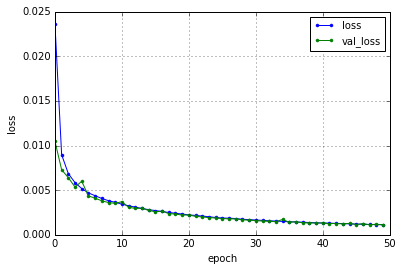

hiden node = 16
-edim=16-Window=128-Overlap=32-RMSprop
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0397 - val_loss: 0.0092
Epoch 2/50
0s - loss: 0.0081 - val_loss: 0.0053
Epoch 3/50
0s - loss: 0.0060 - val_loss: 0.0058
Epoch 4/50
1s - loss: 0.0052 - val_loss: 0.0040
Epoch 5/50
1s - loss: 0.0047 - val_loss: 0.0069
Epoch 6/50
1s - loss: 0.0045 - val_loss: 0.0037
Epoch 7/50
1s - loss: 0.0041 - val_loss: 0.0033
Epoch 8/50
1s - loss: 0.0039 - val_loss: 0.0038
Epoch 9/50
1s - loss: 0.0036 - val_loss: 0.0021
Epoch 10/50
0s - loss: 0.0034 - val_loss: 0.0024
Epoch 11/50
0s - loss: 0.0033 - val_loss: 0.0017
Epoch 12/50
0s - loss: 0.0032 - val_loss: 0.0021
Epoch 13/50
1s - loss: 0.0030 - val_loss: 0.0030
Epoch 14/50
0s - loss: 0.0030 - val_loss: 0.0024
Epoch 15/50
1s - loss: 0.0030 - val_loss: 0.0015
Epoch 16/50
0s - loss: 0.0029 - val_loss: 0.0014
Epoch 17/50
1s - loss: 0.0028 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0028 - val_loss: 0.0018
Epoch 19/50
1s - loss: 0

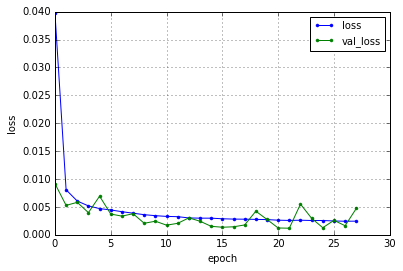

hiden node = 16
-edim=16-Window=128-Overlap=32-Nadam
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
1s - loss: 0.0370 - val_loss: 0.0120
Epoch 2/50
1s - loss: 0.0097 - val_loss: 0.0087
Epoch 3/50
1s - loss: 0.0068 - val_loss: 0.0049
Epoch 4/50
1s - loss: 0.0060 - val_loss: 0.0040
Epoch 5/50
1s - loss: 0.0051 - val_loss: 0.0043
Epoch 6/50
1s - loss: 0.0043 - val_loss: 0.0029
Epoch 7/50
1s - loss: 0.0036 - val_loss: 0.0024
Epoch 8/50
1s - loss: 0.0034 - val_loss: 0.0020
Epoch 9/50
1s - loss: 0.0030 - val_loss: 0.0017
Epoch 10/50
1s - loss: 0.0026 - val_loss: 0.0042
Epoch 11/50
1s - loss: 0.0026 - val_loss: 0.0042
Epoch 12/50
1s - loss: 0.0023 - val_loss: 0.0029
Epoch 13/50
1s - loss: 0.0021 - val_loss: 0.0012
Epoch 14/50
1s - loss: 0.0023 - val_loss: 0.0011
Epoch 15/50
1s - loss: 0.0020 - val_loss: 0.0010
Epoch 16/50
1s - loss: 0.0017 - val_loss: 0.0030
Epoch 17/50
1s - loss: 0.0018 - val_loss: 9.1490e-04
Epoch 18/50
1s - loss: 0.0019 - val_loss: 9.1064e-04
Epoch 19/50
1s - l

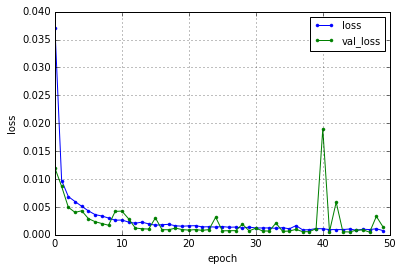

AccY is registed now
Build Complete
(254742,)
windowData's num =7953
SourceData's aborting data = 22
window shape is (7953, 256, 1)
hiden node = 16
-edim=16-Window=256-Overlap=32-SGD
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.2860 - val_loss: 0.2675
Epoch 2/50
1s - loss: 0.2514 - val_loss: 0.2347
Epoch 3/50
1s - loss: 0.2175 - val_loss: 0.2002
Epoch 4/50
1s - loss: 0.1837 - val_loss: 0.1677
Epoch 5/50
1s - loss: 0.1534 - val_loss: 0.1398
Epoch 6/50
1s - loss: 0.1282 - val_loss: 0.1174
Epoch 7/50
1s - loss: 0.1083 - val_loss: 0.0999
Epoch 8/50
1s - loss: 0.0929 - val_loss: 0.0865
Epoch 9/50
1s - loss: 0.0811 - val_loss: 0.0761
Epoch 10/50
1s - loss: 0.0720 - val_loss: 0.0681
Epoch 11/50
1s - loss: 0.0649 - val_loss: 0.0618
Epoch 12/50
1s - loss: 0.0592 - val_loss: 0.0567
Epoch 13/50
1s - loss: 0.0546 - val_loss: 0.0526
Epoch 14/50
1s - loss: 0.0508 - val_loss: 0.0491
Epoch 15/50
1s - loss: 0.0477 - val_loss: 0.0462
Epoch 16/50
1s - loss: 0.0450 - val_loss: 0

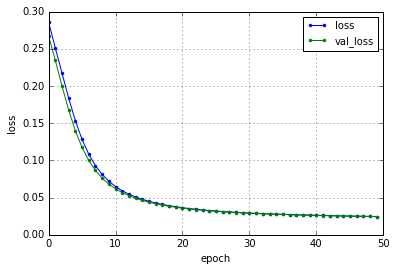

hiden node = 16
-edim=16-Window=256-Overlap=32-Adadelta
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.0784 - val_loss: 0.0254
Epoch 2/50
1s - loss: 0.0219 - val_loss: 0.0186
Epoch 3/50
1s - loss: 0.0167 - val_loss: 0.0151
Epoch 4/50
1s - loss: 0.0133 - val_loss: 0.0119
Epoch 5/50
1s - loss: 0.0116 - val_loss: 0.0105
Epoch 6/50
1s - loss: 0.0105 - val_loss: 0.0094
Epoch 7/50
1s - loss: 0.0095 - val_loss: 0.0088
Epoch 8/50
1s - loss: 0.0090 - val_loss: 0.0081
Epoch 9/50
1s - loss: 0.0083 - val_loss: 0.0086
Epoch 10/50
1s - loss: 0.0082 - val_loss: 0.0075
Epoch 11/50
0s - loss: 0.0078 - val_loss: 0.0068
Epoch 12/50
1s - loss: 0.0072 - val_loss: 0.0066
Epoch 13/50
1s - loss: 0.0073 - val_loss: 0.0076
Epoch 14/50
0s - loss: 0.0070 - val_loss: 0.0082
Epoch 15/50
1s - loss: 0.0065 - val_loss: 0.0065
Epoch 16/50
0s - loss: 0.0065 - val_loss: 0.0074
Epoch 17/50
0s - loss: 0.0064 - val_loss: 0.0057
Epoch 18/50
0s - loss: 0.0060 - val_loss: 0.0064
Epoch 19/50
1s - loss: 

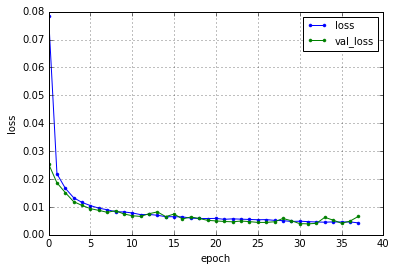

hiden node = 16
-edim=16-Window=256-Overlap=32-Adamax
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.0460 - val_loss: 0.0189
Epoch 2/50
1s - loss: 0.0158 - val_loss: 0.0133
Epoch 3/50
1s - loss: 0.0118 - val_loss: 0.0102
Epoch 4/50
1s - loss: 0.0093 - val_loss: 0.0082
Epoch 5/50
1s - loss: 0.0076 - val_loss: 0.0075
Epoch 6/50
1s - loss: 0.0065 - val_loss: 0.0058
Epoch 7/50
1s - loss: 0.0057 - val_loss: 0.0051
Epoch 8/50
1s - loss: 0.0049 - val_loss: 0.0044
Epoch 9/50
1s - loss: 0.0043 - val_loss: 0.0039
Epoch 10/50
1s - loss: 0.0038 - val_loss: 0.0035
Epoch 11/50
1s - loss: 0.0034 - val_loss: 0.0034
Epoch 12/50
1s - loss: 0.0030 - val_loss: 0.0027
Epoch 13/50
1s - loss: 0.0026 - val_loss: 0.0024
Epoch 14/50
1s - loss: 0.0025 - val_loss: 0.0025
Epoch 15/50
1s - loss: 0.0023 - val_loss: 0.0019
Epoch 16/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 17/50
1s - loss: 0.0019 - val_loss: 0.0016
Epoch 18/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 19/50
1s - loss: 0.

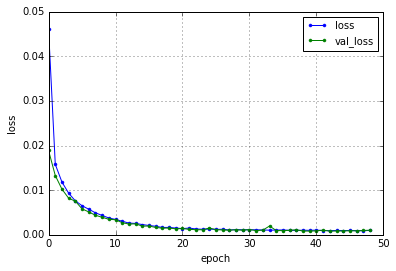

hiden node = 16
-edim=16-Window=256-Overlap=32-Adam
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.0545 - val_loss: 0.0194
Epoch 2/50
1s - loss: 0.0155 - val_loss: 0.0118
Epoch 3/50
1s - loss: 0.0104 - val_loss: 0.0090
Epoch 4/50
1s - loss: 0.0077 - val_loss: 0.0067
Epoch 5/50
1s - loss: 0.0068 - val_loss: 0.0056
Epoch 6/50
1s - loss: 0.0056 - val_loss: 0.0057
Epoch 7/50
0s - loss: 0.0048 - val_loss: 0.0042
Epoch 8/50
0s - loss: 0.0042 - val_loss: 0.0044
Epoch 9/50
0s - loss: 0.0040 - val_loss: 0.0034
Epoch 10/50
1s - loss: 0.0035 - val_loss: 0.0031
Epoch 11/50
1s - loss: 0.0030 - val_loss: 0.0029
Epoch 12/50
1s - loss: 0.0029 - val_loss: 0.0027
Epoch 13/50
1s - loss: 0.0025 - val_loss: 0.0026
Epoch 14/50
1s - loss: 0.0023 - val_loss: 0.0020
Epoch 15/50
1s - loss: 0.0022 - val_loss: 0.0026
Epoch 16/50
1s - loss: 0.0022 - val_loss: 0.0019
Epoch 17/50
1s - loss: 0.0018 - val_loss: 0.0016
Epoch 18/50
1s - loss: 0.0018 - val_loss: 0.0015
Epoch 19/50
1s - loss: 0.00

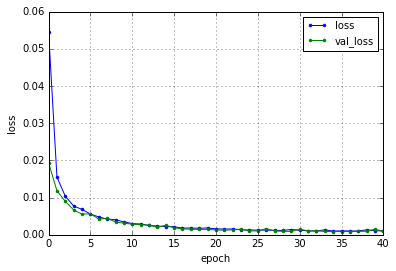

hiden node = 16
-edim=16-Window=256-Overlap=32-Adagrad
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
1s - loss: 0.0327 - val_loss: 0.0174
Epoch 2/50
1s - loss: 0.0155 - val_loss: 0.0158
Epoch 3/50
0s - loss: 0.0123 - val_loss: 0.0111
Epoch 4/50
0s - loss: 0.0106 - val_loss: 0.0093
Epoch 5/50
0s - loss: 0.0091 - val_loss: 0.0086
Epoch 6/50
1s - loss: 0.0083 - val_loss: 0.0086
Epoch 7/50
1s - loss: 0.0078 - val_loss: 0.0071
Epoch 8/50
1s - loss: 0.0071 - val_loss: 0.0066
Epoch 9/50
1s - loss: 0.0067 - val_loss: 0.0072
Epoch 10/50
1s - loss: 0.0064 - val_loss: 0.0060
Epoch 11/50
1s - loss: 0.0061 - val_loss: 0.0058
Epoch 12/50
1s - loss: 0.0058 - val_loss: 0.0055
Epoch 13/50
0s - loss: 0.0056 - val_loss: 0.0054
Epoch 14/50
0s - loss: 0.0054 - val_loss: 0.0053
Epoch 15/50
0s - loss: 0.0052 - val_loss: 0.0052
Epoch 16/50
0s - loss: 0.0050 - val_loss: 0.0056
Epoch 17/50
0s - loss: 0.0049 - val_loss: 0.0046
Epoch 18/50
0s - loss: 0.0047 - val_loss: 0.0045
Epoch 19/50
0s - loss: 0

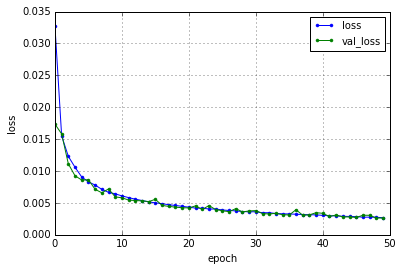

hiden node = 16
-edim=16-Window=256-Overlap=32-RMSprop
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0437 - val_loss: 0.0138
Epoch 2/50
0s - loss: 0.0139 - val_loss: 0.0096
Epoch 3/50
0s - loss: 0.0112 - val_loss: 0.0101
Epoch 4/50
0s - loss: 0.0100 - val_loss: 0.0068
Epoch 5/50
0s - loss: 0.0091 - val_loss: 0.0061
Epoch 6/50
0s - loss: 0.0085 - val_loss: 0.0062
Epoch 7/50
0s - loss: 0.0080 - val_loss: 0.0081
Epoch 8/50
0s - loss: 0.0075 - val_loss: 0.0100
Epoch 9/50
0s - loss: 0.0072 - val_loss: 0.0081
Epoch 10/50
0s - loss: 0.0071 - val_loss: 0.0151
Epoch 11/50
0s - loss: 0.0067 - val_loss: 0.0085


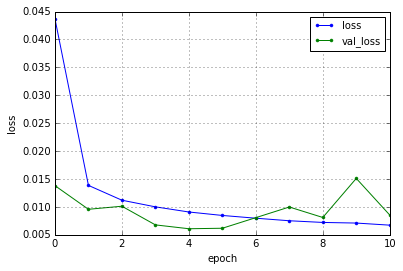

hiden node = 16
-edim=16-Window=256-Overlap=32-Nadam
Train on 7953 samples, validate on 7953 samples
Epoch 1/50
0s - loss: 0.0410 - val_loss: 0.0174
Epoch 2/50
0s - loss: 0.0151 - val_loss: 0.0278
Epoch 3/50
0s - loss: 0.0113 - val_loss: 0.0096
Epoch 4/50
0s - loss: 0.0101 - val_loss: 0.0127
Epoch 5/50
0s - loss: 0.0086 - val_loss: 0.0057
Epoch 6/50
0s - loss: 0.0077 - val_loss: 0.0057
Epoch 7/50
0s - loss: 0.0073 - val_loss: 0.0056
Epoch 8/50
0s - loss: 0.0065 - val_loss: 0.0052
Epoch 9/50
0s - loss: 0.0060 - val_loss: 0.0072
Epoch 10/50
0s - loss: 0.0056 - val_loss: 0.0165
Epoch 11/50
0s - loss: 0.0053 - val_loss: 0.0033
Epoch 12/50
0s - loss: 0.0048 - val_loss: 0.0038
Epoch 13/50
0s - loss: 0.0050 - val_loss: 0.0072
Epoch 14/50
0s - loss: 0.0049 - val_loss: 0.0034
Epoch 15/50
0s - loss: 0.0042 - val_loss: 0.0109
Epoch 16/50
0s - loss: 0.0041 - val_loss: 0.0031
Epoch 17/50
0s - loss: 0.0038 - val_loss: 0.0099
Epoch 18/50
0s - loss: 0.0035 - val_loss: 0.0022
Epoch 19/50
0s - loss: 0.0

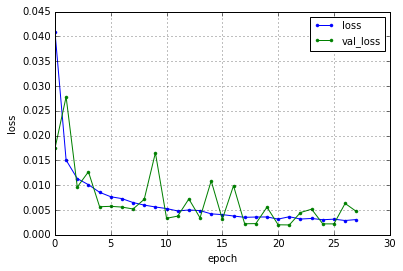

AccY is registed now
Build Complete
(254742,)
windowData's num =7945
SourceData's aborting data = 22
window shape is (7945, 512, 1)
hiden node = 16
-edim=16-Window=512-Overlap=32-SGD
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
1s - loss: 0.2971 - val_loss: 0.2874
Epoch 2/50
1s - loss: 0.2786 - val_loss: 0.2692
Epoch 3/50
1s - loss: 0.2590 - val_loss: 0.2482
Epoch 4/50
1s - loss: 0.2372 - val_loss: 0.2259
Epoch 5/50
1s - loss: 0.2151 - val_loss: 0.2043
Epoch 6/50
1s - loss: 0.1943 - val_loss: 0.1844
Epoch 7/50
1s - loss: 0.1754 - val_loss: 0.1667
Epoch 8/50
1s - loss: 0.1589 - val_loss: 0.1513
Epoch 9/50
1s - loss: 0.1444 - val_loss: 0.1379
Epoch 10/50
0s - loss: 0.1320 - val_loss: 0.1263
Epoch 11/50
0s - loss: 0.1213 - val_loss: 0.1164
Epoch 12/50
1s - loss: 0.1121 - val_loss: 0.1079
Epoch 13/50
1s - loss: 0.1042 - val_loss: 0.1006
Epoch 14/50
1s - loss: 0.0973 - val_loss: 0.0942
Epoch 15/50
1s - loss: 0.0914 - val_loss: 0.0886
Epoch 16/50
1s - loss: 0.0861 - val_loss: 0

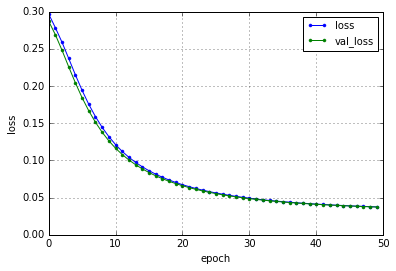

hiden node = 16
-edim=16-Window=512-Overlap=32-Adadelta
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
1s - loss: 0.0981 - val_loss: 0.0370
Epoch 2/50
1s - loss: 0.0307 - val_loss: 0.0267
Epoch 3/50
1s - loss: 0.0253 - val_loss: 0.0230
Epoch 4/50
1s - loss: 0.0220 - val_loss: 0.0259
Epoch 5/50
1s - loss: 0.0202 - val_loss: 0.0198
Epoch 6/50
0s - loss: 0.0184 - val_loss: 0.0171
Epoch 7/50
0s - loss: 0.0173 - val_loss: 0.0176
Epoch 8/50
1s - loss: 0.0161 - val_loss: 0.0171
Epoch 9/50
1s - loss: 0.0157 - val_loss: 0.0145
Epoch 10/50
0s - loss: 0.0148 - val_loss: 0.0133
Epoch 11/50
0s - loss: 0.0141 - val_loss: 0.0147
Epoch 12/50
1s - loss: 0.0136 - val_loss: 0.0124
Epoch 13/50
1s - loss: 0.0131 - val_loss: 0.0117
Epoch 14/50
1s - loss: 0.0128 - val_loss: 0.0120
Epoch 15/50
1s - loss: 0.0123 - val_loss: 0.0115
Epoch 16/50
1s - loss: 0.0123 - val_loss: 0.0124
Epoch 17/50
1s - loss: 0.0118 - val_loss: 0.0122
Epoch 18/50
1s - loss: 0.0113 - val_loss: 0.0104
Epoch 19/50
1s - loss: 

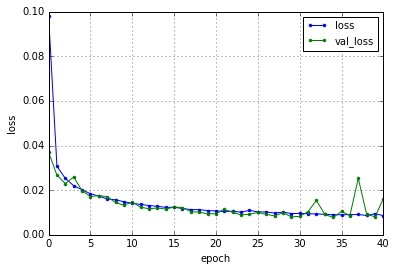

hiden node = 16
-edim=16-Window=512-Overlap=32-Adamax
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
1s - loss: 0.0535 - val_loss: 0.0259
Epoch 2/50
1s - loss: 0.0222 - val_loss: 0.0199
Epoch 3/50
1s - loss: 0.0172 - val_loss: 0.0153
Epoch 4/50
1s - loss: 0.0139 - val_loss: 0.0123
Epoch 5/50
1s - loss: 0.0117 - val_loss: 0.0105
Epoch 6/50
1s - loss: 0.0101 - val_loss: 0.0094
Epoch 7/50
1s - loss: 0.0090 - val_loss: 0.0098
Epoch 8/50
1s - loss: 0.0083 - val_loss: 0.0072
Epoch 9/50
1s - loss: 0.0071 - val_loss: 0.0070
Epoch 10/50
0s - loss: 0.0064 - val_loss: 0.0061
Epoch 11/50
0s - loss: 0.0059 - val_loss: 0.0053
Epoch 12/50
0s - loss: 0.0056 - val_loss: 0.0051
Epoch 13/50
1s - loss: 0.0052 - val_loss: 0.0047
Epoch 14/50
1s - loss: 0.0049 - val_loss: 0.0044
Epoch 15/50
1s - loss: 0.0047 - val_loss: 0.0042
Epoch 16/50
1s - loss: 0.0045 - val_loss: 0.0041
Epoch 17/50
1s - loss: 0.0044 - val_loss: 0.0040
Epoch 18/50
1s - loss: 0.0040 - val_loss: 0.0037
Epoch 19/50
0s - loss: 0.

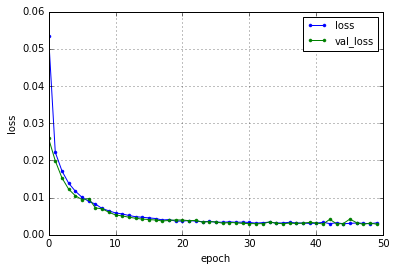

hiden node = 16
-edim=16-Window=512-Overlap=32-Adam
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
1s - loss: 0.0576 - val_loss: 0.0226
Epoch 2/50
1s - loss: 0.0191 - val_loss: 0.0172
Epoch 3/50
1s - loss: 0.0143 - val_loss: 0.0119
Epoch 4/50
1s - loss: 0.0119 - val_loss: 0.0100
Epoch 5/50
1s - loss: 0.0098 - val_loss: 0.0085
Epoch 6/50
1s - loss: 0.0086 - val_loss: 0.0075
Epoch 7/50
1s - loss: 0.0072 - val_loss: 0.0086
Epoch 8/50
1s - loss: 0.0067 - val_loss: 0.0071
Epoch 9/50
1s - loss: 0.0062 - val_loss: 0.0059
Epoch 10/50
0s - loss: 0.0053 - val_loss: 0.0053
Epoch 11/50
1s - loss: 0.0053 - val_loss: 0.0048
Epoch 12/50
1s - loss: 0.0052 - val_loss: 0.0046
Epoch 13/50
1s - loss: 0.0052 - val_loss: 0.0044
Epoch 14/50
1s - loss: 0.0043 - val_loss: 0.0040
Epoch 15/50
1s - loss: 0.0044 - val_loss: 0.0038
Epoch 16/50
1s - loss: 0.0043 - val_loss: 0.0037
Epoch 17/50
1s - loss: 0.0039 - val_loss: 0.0048
Epoch 18/50
0s - loss: 0.0038 - val_loss: 0.0034
Epoch 19/50
1s - loss: 0.00

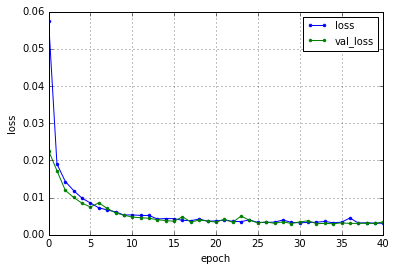

hiden node = 16
-edim=16-Window=512-Overlap=32-Adagrad
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0415 - val_loss: 0.0233
Epoch 2/50
0s - loss: 0.0217 - val_loss: 0.0181
Epoch 3/50
0s - loss: 0.0179 - val_loss: 0.0153
Epoch 4/50
0s - loss: 0.0155 - val_loss: 0.0150
Epoch 5/50
0s - loss: 0.0141 - val_loss: 0.0133
Epoch 6/50
0s - loss: 0.0129 - val_loss: 0.0126
Epoch 7/50
0s - loss: 0.0122 - val_loss: 0.0109
Epoch 8/50
0s - loss: 0.0112 - val_loss: 0.0104
Epoch 9/50
0s - loss: 0.0108 - val_loss: 0.0118
Epoch 10/50
0s - loss: 0.0104 - val_loss: 0.0097
Epoch 11/50
0s - loss: 0.0100 - val_loss: 0.0128
Epoch 12/50
0s - loss: 0.0092 - val_loss: 0.0102
Epoch 13/50
0s - loss: 0.0094 - val_loss: 0.0084
Epoch 14/50
0s - loss: 0.0086 - val_loss: 0.0081
Epoch 15/50
0s - loss: 0.0083 - val_loss: 0.0085
Epoch 16/50
0s - loss: 0.0083 - val_loss: 0.0085
Epoch 17/50
0s - loss: 0.0079 - val_loss: 0.0074
Epoch 18/50
0s - loss: 0.0077 - val_loss: 0.0081
Epoch 19/50
0s - loss: 0

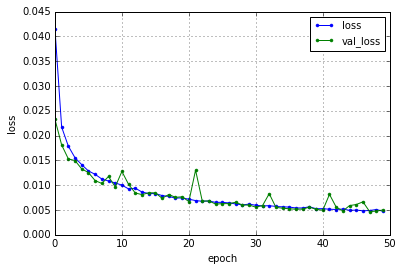

hiden node = 16
-edim=16-Window=512-Overlap=32-RMSprop
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0509 - val_loss: 0.0281
Epoch 2/50
0s - loss: 0.0216 - val_loss: 0.0154
Epoch 3/50
0s - loss: 0.0188 - val_loss: 0.0163
Epoch 4/50
0s - loss: 0.0170 - val_loss: 0.0118
Epoch 5/50
0s - loss: 0.0155 - val_loss: 0.0110
Epoch 6/50
0s - loss: 0.0144 - val_loss: 0.0240
Epoch 7/50
0s - loss: 0.0139 - val_loss: 0.0232
Epoch 8/50
0s - loss: 0.0133 - val_loss: 0.0183
Epoch 9/50
0s - loss: 0.0130 - val_loss: 0.0172
Epoch 10/50
0s - loss: 0.0124 - val_loss: 0.0110
Epoch 11/50
0s - loss: 0.0122 - val_loss: 0.0101
Epoch 12/50
0s - loss: 0.0121 - val_loss: 0.0080
Epoch 13/50
0s - loss: 0.0115 - val_loss: 0.0073
Epoch 14/50
0s - loss: 0.0113 - val_loss: 0.0076
Epoch 15/50
0s - loss: 0.0112 - val_loss: 0.0082
Epoch 16/50
0s - loss: 0.0109 - val_loss: 0.0116
Epoch 17/50
0s - loss: 0.0110 - val_loss: 0.0105
Epoch 18/50
0s - loss: 0.0108 - val_loss: 0.0119
Epoch 19/50
0s - loss: 0

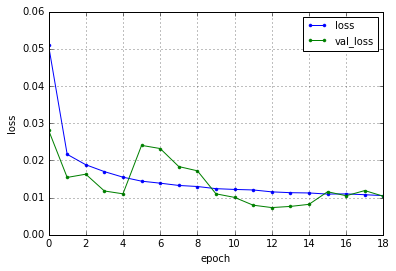

hiden node = 16
-edim=16-Window=512-Overlap=32-Nadam
Train on 7945 samples, validate on 7945 samples
Epoch 1/50
0s - loss: 0.0487 - val_loss: 0.0529
Epoch 2/50
0s - loss: 0.0242 - val_loss: 0.0203
Epoch 3/50
0s - loss: 0.0191 - val_loss: 0.0355
Epoch 4/50
0s - loss: 0.0167 - val_loss: 0.0159
Epoch 5/50
0s - loss: 0.0147 - val_loss: 0.0099
Epoch 6/50
0s - loss: 0.0137 - val_loss: 0.0096
Epoch 7/50
0s - loss: 0.0121 - val_loss: 0.0127
Epoch 8/50
0s - loss: 0.0116 - val_loss: 0.0086
Epoch 9/50
0s - loss: 0.0106 - val_loss: 0.0114
Epoch 10/50
0s - loss: 0.0105 - val_loss: 0.0110
Epoch 11/50
0s - loss: 0.0096 - val_loss: 0.0065
Epoch 12/50
0s - loss: 0.0093 - val_loss: 0.0076
Epoch 13/50
0s - loss: 0.0095 - val_loss: 0.0084
Epoch 14/50
0s - loss: 0.0092 - val_loss: 0.0067
Epoch 15/50
0s - loss: 0.0086 - val_loss: 0.0135
Epoch 16/50
0s - loss: 0.0084 - val_loss: 0.0064
Epoch 17/50
0s - loss: 0.0087 - val_loss: 0.0063
Epoch 18/50
0s - loss: 0.0083 - val_loss: 0.0058
Epoch 19/50
0s - loss: 0.0

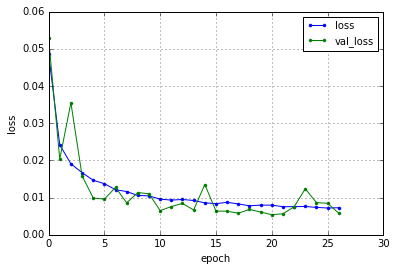

AccY is registed now
Build Complete
(254742,)
windowData's num =7929
SourceData's aborting data = 22
window shape is (7929, 1024, 1)
hiden node = 16
-edim=16-Window=1024-Overlap=32-SGD
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.3019 - val_loss: 0.2967
Epoch 2/50
1s - loss: 0.2914 - val_loss: 0.2860
Epoch 3/50
0s - loss: 0.2805 - val_loss: 0.2748
Epoch 4/50
1s - loss: 0.2688 - val_loss: 0.2627
Epoch 5/50
0s - loss: 0.2564 - val_loss: 0.2500
Epoch 6/50
0s - loss: 0.2437 - val_loss: 0.2374
Epoch 7/50
0s - loss: 0.2312 - val_loss: 0.2250
Epoch 8/50
1s - loss: 0.2190 - val_loss: 0.2131
Epoch 9/50
0s - loss: 0.2074 - val_loss: 0.2018
Epoch 10/50
0s - loss: 0.1965 - val_loss: 0.1913
Epoch 11/50
0s - loss: 0.1865 - val_loss: 0.1817
Epoch 12/50
0s - loss: 0.1772 - val_loss: 0.1727
Epoch 13/50
1s - loss: 0.1686 - val_loss: 0.1645
Epoch 14/50
0s - loss: 0.1608 - val_loss: 0.1570
Epoch 15/50
0s - loss: 0.1535 - val_loss: 0.1501
Epoch 16/50
0s - loss: 0.1469 - val_loss:

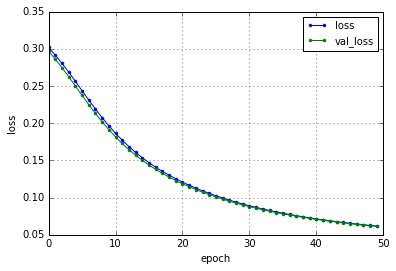

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adadelta
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
1s - loss: 0.1107 - val_loss: 0.0480
Epoch 2/50
1s - loss: 0.0413 - val_loss: 0.0377
Epoch 3/50
0s - loss: 0.0350 - val_loss: 0.0336
Epoch 4/50
1s - loss: 0.0317 - val_loss: 0.0307
Epoch 5/50
1s - loss: 0.0294 - val_loss: 0.0277
Epoch 6/50
1s - loss: 0.0279 - val_loss: 0.0257
Epoch 7/50
0s - loss: 0.0265 - val_loss: 0.0253
Epoch 8/50
0s - loss: 0.0254 - val_loss: 0.0233
Epoch 9/50
1s - loss: 0.0246 - val_loss: 0.0304
Epoch 10/50
0s - loss: 0.0238 - val_loss: 0.0254
Epoch 11/50
1s - loss: 0.0232 - val_loss: 0.0213
Epoch 12/50
0s - loss: 0.0227 - val_loss: 0.0221
Epoch 13/50
1s - loss: 0.0227 - val_loss: 0.0274
Epoch 14/50
1s - loss: 0.0220 - val_loss: 0.0205
Epoch 15/50
1s - loss: 0.0210 - val_loss: 0.0189
Epoch 16/50
0s - loss: 0.0204 - val_loss: 0.0189
Epoch 17/50
0s - loss: 0.0203 - val_loss: 0.0186
Epoch 18/50
1s - loss: 0.0199 - val_loss: 0.0176
Epoch 19/50
1s - loss:

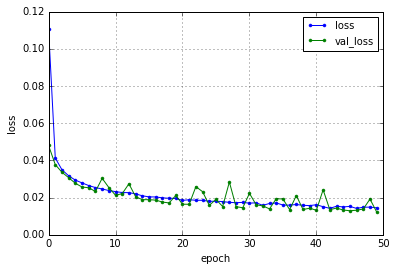

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adamax
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0594 - val_loss: 0.0316
Epoch 2/50
0s - loss: 0.0282 - val_loss: 0.0248
Epoch 3/50
0s - loss: 0.0226 - val_loss: 0.0200
Epoch 4/50
1s - loss: 0.0186 - val_loss: 0.0171
Epoch 5/50
1s - loss: 0.0159 - val_loss: 0.0141
Epoch 6/50
1s - loss: 0.0138 - val_loss: 0.0150
Epoch 7/50
1s - loss: 0.0123 - val_loss: 0.0110
Epoch 8/50
0s - loss: 0.0112 - val_loss: 0.0100
Epoch 9/50
1s - loss: 0.0100 - val_loss: 0.0091
Epoch 10/50
1s - loss: 0.0093 - val_loss: 0.0100
Epoch 11/50
0s - loss: 0.0084 - val_loss: 0.0081
Epoch 12/50
1s - loss: 0.0083 - val_loss: 0.0075
Epoch 13/50
1s - loss: 0.0081 - val_loss: 0.0074
Epoch 14/50
0s - loss: 0.0075 - val_loss: 0.0074
Epoch 15/50
1s - loss: 0.0078 - val_loss: 0.0079
Epoch 16/50
1s - loss: 0.0072 - val_loss: 0.0071
Epoch 17/50
0s - loss: 0.0077 - val_loss: 0.0079
Epoch 18/50
0s - loss: 0.0068 - val_loss: 0.0064
Epoch 19/50
0s - loss: 0

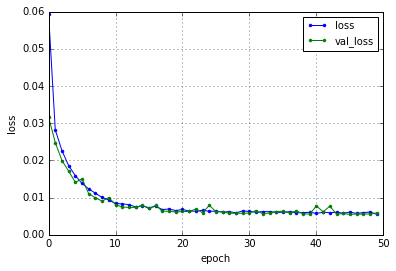

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adam
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0627 - val_loss: 0.0288
Epoch 2/50
1s - loss: 0.0259 - val_loss: 0.0208
Epoch 3/50
1s - loss: 0.0197 - val_loss: 0.0171
Epoch 4/50
1s - loss: 0.0161 - val_loss: 0.0139
Epoch 5/50
0s - loss: 0.0136 - val_loss: 0.0121
Epoch 6/50
0s - loss: 0.0121 - val_loss: 0.0113
Epoch 7/50
0s - loss: 0.0109 - val_loss: 0.0104
Epoch 8/50
0s - loss: 0.0105 - val_loss: 0.0089
Epoch 9/50
0s - loss: 0.0100 - val_loss: 0.0087
Epoch 10/50
0s - loss: 0.0099 - val_loss: 0.0081
Epoch 11/50
0s - loss: 0.0083 - val_loss: 0.0077
Epoch 12/50
0s - loss: 0.0084 - val_loss: 0.0073
Epoch 13/50
0s - loss: 0.0091 - val_loss: 0.0077
Epoch 14/50
0s - loss: 0.0085 - val_loss: 0.0073
Epoch 15/50
0s - loss: 0.0075 - val_loss: 0.0078
Epoch 16/50
0s - loss: 0.0081 - val_loss: 0.0067
Epoch 17/50
0s - loss: 0.0075 - val_loss: 0.0068
Epoch 18/50
0s - loss: 0.0076 - val_loss: 0.0069
Epoch 19/50
0s - loss: 0.0

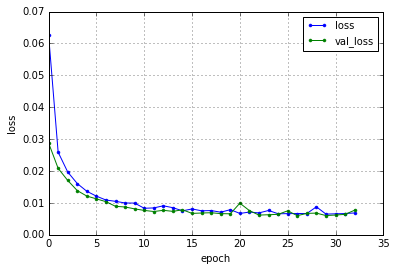

hiden node = 16
-edim=16-Window=1024-Overlap=32-Adagrad
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0515 - val_loss: 0.0290
Epoch 2/50
0s - loss: 0.0279 - val_loss: 0.0234
Epoch 3/50
1s - loss: 0.0240 - val_loss: 0.0209
Epoch 4/50
0s - loss: 0.0217 - val_loss: 0.0200
Epoch 5/50
0s - loss: 0.0200 - val_loss: 0.0184
Epoch 6/50
0s - loss: 0.0187 - val_loss: 0.0197
Epoch 7/50
0s - loss: 0.0174 - val_loss: 0.0164
Epoch 8/50
0s - loss: 0.0166 - val_loss: 0.0147
Epoch 9/50
0s - loss: 0.0155 - val_loss: 0.0211
Epoch 10/50
0s - loss: 0.0149 - val_loss: 0.0138
Epoch 11/50
0s - loss: 0.0144 - val_loss: 0.0130
Epoch 12/50
0s - loss: 0.0139 - val_loss: 0.0126
Epoch 13/50
0s - loss: 0.0137 - val_loss: 0.0128
Epoch 14/50
0s - loss: 0.0130 - val_loss: 0.0127
Epoch 15/50
0s - loss: 0.0126 - val_loss: 0.0126
Epoch 16/50
0s - loss: 0.0123 - val_loss: 0.0153
Epoch 17/50
0s - loss: 0.0123 - val_loss: 0.0182
Epoch 18/50
0s - loss: 0.0121 - val_loss: 0.0109
Epoch 19/50
0s - loss: 

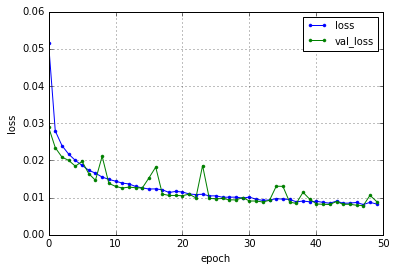

hiden node = 16
-edim=16-Window=1024-Overlap=32-RMSprop
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0587 - val_loss: 0.0281
Epoch 2/50
0s - loss: 0.0322 - val_loss: 0.0416
Epoch 3/50
0s - loss: 0.0286 - val_loss: 0.0204
Epoch 4/50
0s - loss: 0.0267 - val_loss: 0.0204
Epoch 5/50
0s - loss: 0.0251 - val_loss: 0.0200
Epoch 6/50
0s - loss: 0.0243 - val_loss: 0.0187
Epoch 7/50
0s - loss: 0.0231 - val_loss: 0.0181
Epoch 8/50
0s - loss: 0.0226 - val_loss: 0.0177
Epoch 9/50
0s - loss: 0.0218 - val_loss: 0.0232
Epoch 10/50
0s - loss: 0.0211 - val_loss: 0.0154
Epoch 11/50
0s - loss: 0.0205 - val_loss: 0.0168
Epoch 12/50
0s - loss: 0.0203 - val_loss: 0.0322
Epoch 13/50
0s - loss: 0.0193 - val_loss: 0.0425
Epoch 14/50
0s - loss: 0.0193 - val_loss: 0.0163
Epoch 15/50
0s - loss: 0.0191 - val_loss: 0.0159
Epoch 16/50
0s - loss: 0.0191 - val_loss: 0.0197


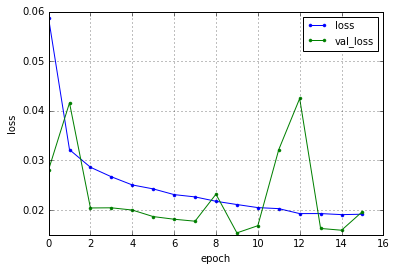

hiden node = 16
-edim=16-Window=1024-Overlap=32-Nadam
Train on 7929 samples, validate on 7929 samples
Epoch 1/50
0s - loss: 0.0650 - val_loss: 0.0406
Epoch 2/50
1s - loss: 0.0378 - val_loss: 0.0294
Epoch 3/50
1s - loss: 0.0315 - val_loss: 0.0249
Epoch 4/50
0s - loss: 0.0320 - val_loss: 0.0262
Epoch 5/50
1s - loss: 0.0299 - val_loss: 0.0265
Epoch 6/50
1s - loss: 0.0287 - val_loss: 0.0237
Epoch 7/50
1s - loss: 0.0293 - val_loss: 0.0234
Epoch 8/50
1s - loss: 0.0284 - val_loss: 0.1068
Epoch 9/50
0s - loss: 0.0266 - val_loss: 0.0201
Epoch 10/50
0s - loss: 0.0246 - val_loss: 0.0270
Epoch 11/50
0s - loss: 0.0214 - val_loss: 0.0204
Epoch 12/50
0s - loss: 0.0191 - val_loss: 0.0144
Epoch 13/50
0s - loss: 0.0176 - val_loss: 0.0291
Epoch 14/50
0s - loss: 0.0192 - val_loss: 0.0291
Epoch 15/50
0s - loss: 0.0190 - val_loss: 0.0150
Epoch 16/50
0s - loss: 0.0155 - val_loss: 0.0520
Epoch 17/50
0s - loss: 0.0152 - val_loss: 0.0153
Epoch 18/50
0s - loss: 0.0156 - val_loss: 0.0188


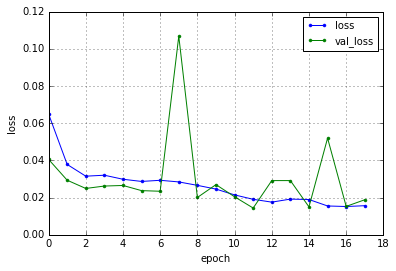

AccY is registed now
Build Complete
(254742,)
windowData's num =7897
SourceData's aborting data = 22
window shape is (7897, 2048, 1)
hiden node = 16
-edim=16-Window=2048-Overlap=32-SGD
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.3034 - val_loss: 0.3007
Epoch 2/50
1s - loss: 0.2984 - val_loss: 0.2961
Epoch 3/50
1s - loss: 0.2936 - val_loss: 0.2909
Epoch 4/50
1s - loss: 0.2880 - val_loss: 0.2849
Epoch 5/50
1s - loss: 0.2817 - val_loss: 0.2783
Epoch 6/50
1s - loss: 0.2749 - val_loss: 0.2713
Epoch 7/50
1s - loss: 0.2677 - val_loss: 0.2641
Epoch 8/50
1s - loss: 0.2605 - val_loss: 0.2569
Epoch 9/50
1s - loss: 0.2533 - val_loss: 0.2497
Epoch 10/50
1s - loss: 0.2462 - val_loss: 0.2428
Epoch 11/50
2s - loss: 0.2394 - val_loss: 0.2361
Epoch 12/50
2s - loss: 0.2328 - val_loss: 0.2296
Epoch 13/50
2s - loss: 0.2265 - val_loss: 0.2234
Epoch 14/50
1s - loss: 0.2204 - val_loss: 0.2175
Epoch 15/50
2s - loss: 0.2146 - val_loss: 0.2118
Epoch 16/50
2s - loss: 0.2091 - val_loss:

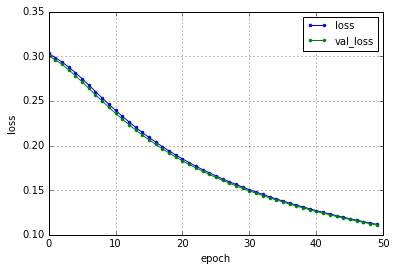

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adadelta
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
2s - loss: 0.1430 - val_loss: 0.0741
Epoch 2/50
2s - loss: 0.0612 - val_loss: 0.0534
Epoch 3/50
2s - loss: 0.0491 - val_loss: 0.0474
Epoch 4/50
2s - loss: 0.0440 - val_loss: 0.0410
Epoch 5/50
1s - loss: 0.0409 - val_loss: 0.0392
Epoch 6/50
1s - loss: 0.0390 - val_loss: 0.0375
Epoch 7/50
1s - loss: 0.0377 - val_loss: 0.0349
Epoch 8/50
1s - loss: 0.0363 - val_loss: 0.0455
Epoch 9/50
1s - loss: 0.0355 - val_loss: 0.0443
Epoch 10/50
1s - loss: 0.0341 - val_loss: 0.0364
Epoch 11/50
2s - loss: 0.0333 - val_loss: 0.0331
Epoch 12/50
1s - loss: 0.0326 - val_loss: 0.0474
Epoch 13/50
1s - loss: 0.0320 - val_loss: 0.0300
Epoch 14/50
1s - loss: 0.0312 - val_loss: 0.0327
Epoch 15/50
2s - loss: 0.0305 - val_loss: 0.0303
Epoch 16/50
1s - loss: 0.0304 - val_loss: 0.0299
Epoch 17/50
1s - loss: 0.0301 - val_loss: 0.0311
Epoch 18/50
1s - loss: 0.0300 - val_loss: 0.0287
Epoch 19/50
1s - loss:

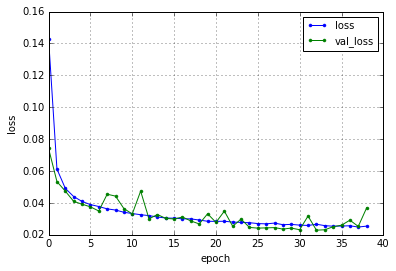

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adamax
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0683 - val_loss: 0.0368
Epoch 2/50
1s - loss: 0.0336 - val_loss: 0.0293
Epoch 3/50
2s - loss: 0.0277 - val_loss: 0.0266
Epoch 4/50
2s - loss: 0.0242 - val_loss: 0.0226
Epoch 5/50
2s - loss: 0.0222 - val_loss: 0.0201
Epoch 6/50
1s - loss: 0.0197 - val_loss: 0.0189
Epoch 7/50
1s - loss: 0.0191 - val_loss: 0.0169
Epoch 8/50
1s - loss: 0.0170 - val_loss: 0.0158
Epoch 9/50
1s - loss: 0.0156 - val_loss: 0.0147
Epoch 10/50
1s - loss: 0.0153 - val_loss: 0.0158
Epoch 11/50
1s - loss: 0.0145 - val_loss: 0.0133
Epoch 12/50
1s - loss: 0.0141 - val_loss: 0.0135
Epoch 13/50
1s - loss: 0.0141 - val_loss: 0.0129
Epoch 14/50
1s - loss: 0.0129 - val_loss: 0.0138
Epoch 15/50
2s - loss: 0.0134 - val_loss: 0.0122
Epoch 16/50
1s - loss: 0.0123 - val_loss: 0.0121
Epoch 17/50
2s - loss: 0.0131 - val_loss: 0.0123
Epoch 18/50
1s - loss: 0.0131 - val_loss: 0.0119
Epoch 19/50
2s - loss: 0

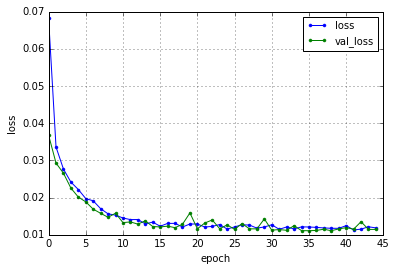

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adam
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0707 - val_loss: 0.0347
Epoch 2/50
2s - loss: 0.0347 - val_loss: 0.0288
Epoch 3/50
1s - loss: 0.0267 - val_loss: 0.0231
Epoch 4/50
2s - loss: 0.0240 - val_loss: 0.0211
Epoch 5/50
1s - loss: 0.0227 - val_loss: 0.0206
Epoch 6/50
1s - loss: 0.0193 - val_loss: 0.0187
Epoch 7/50
1s - loss: 0.0205 - val_loss: 0.0168
Epoch 8/50
1s - loss: 0.0185 - val_loss: 0.0156
Epoch 9/50
1s - loss: 0.0167 - val_loss: 0.0148
Epoch 10/50
1s - loss: 0.0170 - val_loss: 0.0151
Epoch 11/50
1s - loss: 0.0173 - val_loss: 0.0172
Epoch 12/50
1s - loss: 0.0155 - val_loss: 0.0157
Epoch 13/50
1s - loss: 0.0156 - val_loss: 0.0153
Epoch 14/50
1s - loss: 0.0147 - val_loss: 0.0141
Epoch 15/50
1s - loss: 0.0150 - val_loss: 0.0143
Epoch 16/50
1s - loss: 0.0144 - val_loss: 0.0130
Epoch 17/50
1s - loss: 0.0189 - val_loss: 0.0165
Epoch 18/50
1s - loss: 0.0159 - val_loss: 0.0163
Epoch 19/50
1s - loss: 0.0

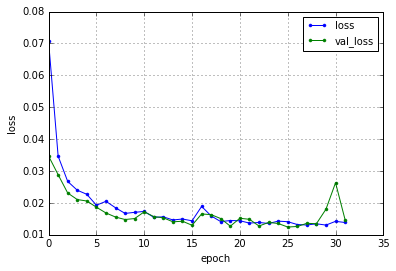

hiden node = 16
-edim=16-Window=2048-Overlap=32-Adagrad
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0676 - val_loss: 0.0449
Epoch 2/50
2s - loss: 0.0380 - val_loss: 0.0318
Epoch 3/50
2s - loss: 0.0323 - val_loss: 0.0616
Epoch 4/50
1s - loss: 0.0299 - val_loss: 0.0257
Epoch 5/50
1s - loss: 0.0294 - val_loss: 0.0285
Epoch 6/50
1s - loss: 0.0259 - val_loss: 0.0341
Epoch 7/50
1s - loss: 0.0254 - val_loss: 0.0229
Epoch 8/50
1s - loss: 0.0239 - val_loss: 0.0240
Epoch 9/50
1s - loss: 0.0231 - val_loss: 0.0244
Epoch 10/50
1s - loss: 0.0225 - val_loss: 0.0235
Epoch 11/50
1s - loss: 0.0219 - val_loss: 0.0194
Epoch 12/50
1s - loss: 0.0210 - val_loss: 0.0266
Epoch 13/50
1s - loss: 0.0208 - val_loss: 0.0209
Epoch 14/50
1s - loss: 0.0202 - val_loss: 0.0338
Epoch 15/50
1s - loss: 0.0200 - val_loss: 0.0186
Epoch 16/50
1s - loss: 0.0195 - val_loss: 0.0174
Epoch 17/50
1s - loss: 0.0189 - val_loss: 0.0199
Epoch 18/50
1s - loss: 0.0194 - val_loss: 0.0200
Epoch 19/50
1s - loss: 

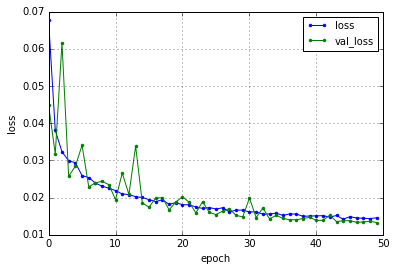

hiden node = 16
-edim=16-Window=2048-Overlap=32-RMSprop
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0735 - val_loss: 0.0395
Epoch 2/50
1s - loss: 0.0456 - val_loss: 0.0341
Epoch 3/50
1s - loss: 0.0417 - val_loss: 0.0594
Epoch 4/50
1s - loss: 0.0400 - val_loss: 0.0378
Epoch 5/50
1s - loss: 0.0385 - val_loss: 0.0311
Epoch 6/50
1s - loss: 0.0370 - val_loss: 0.0502
Epoch 7/50
1s - loss: 0.0360 - val_loss: 0.0325
Epoch 8/50
1s - loss: 0.0351 - val_loss: 0.0257
Epoch 9/50
1s - loss: 0.0349 - val_loss: 0.0337
Epoch 10/50
1s - loss: 0.0341 - val_loss: 0.0263
Epoch 11/50
1s - loss: 0.0331 - val_loss: 0.0283
Epoch 12/50
1s - loss: 0.0329 - val_loss: 0.0264
Epoch 13/50
1s - loss: 0.0321 - val_loss: 0.0233
Epoch 14/50
1s - loss: 0.0320 - val_loss: 0.0573
Epoch 15/50
1s - loss: 0.0314 - val_loss: 0.0358
Epoch 16/50
1s - loss: 0.0312 - val_loss: 0.0236
Epoch 17/50
1s - loss: 0.0306 - val_loss: 0.0281
Epoch 18/50
1s - loss: 0.0304 - val_loss: 0.0247
Epoch 19/50
1s - loss: 

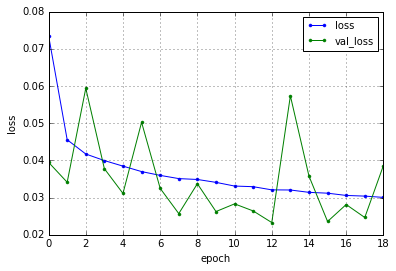

hiden node = 16
-edim=16-Window=2048-Overlap=32-Nadam
Train on 7897 samples, validate on 7897 samples
Epoch 1/50
1s - loss: 0.0854 - val_loss: 0.0507
Epoch 2/50
1s - loss: 0.0601 - val_loss: 0.0510
Epoch 3/50
1s - loss: 0.0525 - val_loss: 0.0482
Epoch 4/50
1s - loss: 0.0508 - val_loss: 0.0438
Epoch 5/50
1s - loss: 0.0468 - val_loss: 0.0401
Epoch 6/50
1s - loss: 0.0416 - val_loss: 0.0348
Epoch 7/50
1s - loss: 0.0381 - val_loss: 0.0306
Epoch 8/50
1s - loss: 0.0575 - val_loss: 0.0755
Epoch 9/50
1s - loss: 0.0556 - val_loss: 0.0441
Epoch 10/50
1s - loss: 0.0458 - val_loss: 0.0357
Epoch 11/50
1s - loss: 0.0460 - val_loss: 0.0458
Epoch 12/50
1s - loss: 0.0489 - val_loss: 0.0453
Epoch 13/50
1s - loss: 0.0484 - val_loss: 0.0446


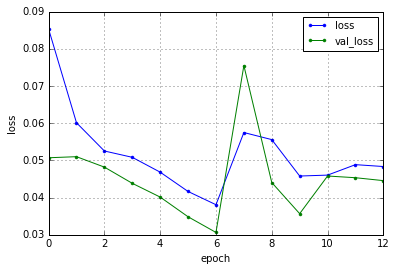

AccY is registed now
Build Complete
(254742,)
windowData's num =7833
SourceData's aborting data = 22
window shape is (7833, 4096, 1)
hiden node = 16
-edim=16-Window=4096-Overlap=32-SGD
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.3061 - val_loss: 0.3047
Epoch 2/50
2s - loss: 0.3037 - val_loss: 0.3025
Epoch 3/50
2s - loss: 0.3013 - val_loss: 0.3000
Epoch 4/50
2s - loss: 0.2986 - val_loss: 0.2971
Epoch 5/50
2s - loss: 0.2955 - val_loss: 0.2939
Epoch 6/50
2s - loss: 0.2922 - val_loss: 0.2905
Epoch 7/50
2s - loss: 0.2888 - val_loss: 0.2870
Epoch 8/50
3s - loss: 0.2852 - val_loss: 0.2834
Epoch 9/50
3s - loss: 0.2815 - val_loss: 0.2797
Epoch 10/50
3s - loss: 0.2778 - val_loss: 0.2760
Epoch 11/50
3s - loss: 0.2741 - val_loss: 0.2722
Epoch 12/50
2s - loss: 0.2704 - val_loss: 0.2685
Epoch 13/50
3s - loss: 0.2667 - val_loss: 0.2648
Epoch 14/50
3s - loss: 0.2630 - val_loss: 0.2612
Epoch 15/50
3s - loss: 0.2594 - val_loss: 0.2576
Epoch 16/50
3s - loss: 0.2558 - val_loss:

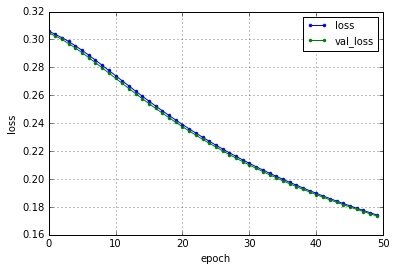

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adadelta
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
2s - loss: 0.1912 - val_loss: 0.1245
Epoch 2/50
3s - loss: 0.1027 - val_loss: 0.0875
Epoch 3/50
2s - loss: 0.0804 - val_loss: 0.0725
Epoch 4/50
2s - loss: 0.0694 - val_loss: 0.0670
Epoch 5/50
2s - loss: 0.0624 - val_loss: 0.0608
Epoch 6/50
2s - loss: 0.0575 - val_loss: 0.0562
Epoch 7/50
2s - loss: 0.0539 - val_loss: 0.0508
Epoch 8/50
2s - loss: 0.0509 - val_loss: 0.0495
Epoch 9/50
3s - loss: 0.0494 - val_loss: 0.0463
Epoch 10/50
3s - loss: 0.0479 - val_loss: 0.0555
Epoch 11/50
2s - loss: 0.0467 - val_loss: 0.0462
Epoch 12/50
3s - loss: 0.0452 - val_loss: 0.0463
Epoch 13/50
3s - loss: 0.0446 - val_loss: 0.0425
Epoch 14/50
2s - loss: 0.0433 - val_loss: 0.0533
Epoch 15/50
2s - loss: 0.0432 - val_loss: 0.0411
Epoch 16/50
4s - loss: 0.0415 - val_loss: 0.0493
Epoch 17/50
3s - loss: 0.0413 - val_loss: 0.0385
Epoch 18/50
2s - loss: 0.0402 - val_loss: 0.0479
Epoch 19/50
2s - loss:

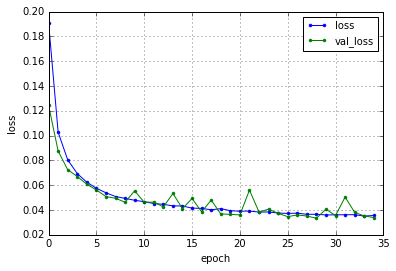

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adamax
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.0816 - val_loss: 0.0448
Epoch 2/50
3s - loss: 0.0413 - val_loss: 0.0364
Epoch 3/50
3s - loss: 0.0346 - val_loss: 0.0362
Epoch 4/50
3s - loss: 0.0316 - val_loss: 0.0297
Epoch 5/50
2s - loss: 0.0282 - val_loss: 0.0306
Epoch 6/50
3s - loss: 0.0272 - val_loss: 0.0248
Epoch 7/50
2s - loss: 0.0249 - val_loss: 0.0235
Epoch 8/50
3s - loss: 0.0249 - val_loss: 0.0239
Epoch 9/50
3s - loss: 0.0228 - val_loss: 0.0227
Epoch 10/50
2s - loss: 0.0229 - val_loss: 0.0238
Epoch 11/50
3s - loss: 0.0222 - val_loss: 0.0251
Epoch 12/50
3s - loss: 0.0218 - val_loss: 0.0234
Epoch 13/50
3s - loss: 0.0217 - val_loss: 0.0202
Epoch 14/50
3s - loss: 0.0223 - val_loss: 0.0212
Epoch 15/50
2s - loss: 0.0205 - val_loss: 0.0217
Epoch 16/50
2s - loss: 0.0214 - val_loss: 0.0202
Epoch 17/50
2s - loss: 0.0214 - val_loss: 0.0215
Epoch 18/50
2s - loss: 0.0212 - val_loss: 0.0200
Epoch 19/50
3s - loss: 0

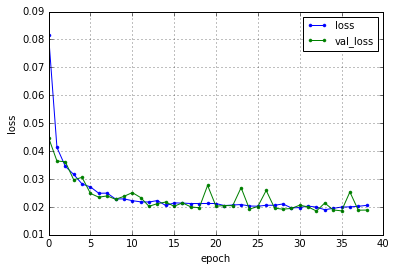

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adam
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.0836 - val_loss: 0.0562
Epoch 2/50
3s - loss: 0.0451 - val_loss: 0.0413
Epoch 3/50
3s - loss: 0.0443 - val_loss: 0.0412
Epoch 4/50
3s - loss: 0.0391 - val_loss: 0.0356
Epoch 5/50
3s - loss: 0.0378 - val_loss: 0.0346
Epoch 6/50
3s - loss: 0.0366 - val_loss: 0.0375
Epoch 7/50
3s - loss: 0.0355 - val_loss: 0.0319
Epoch 8/50
3s - loss: 0.0326 - val_loss: 0.0301
Epoch 9/50
3s - loss: 0.0345 - val_loss: 0.0314
Epoch 10/50
3s - loss: 0.0368 - val_loss: 0.0338
Epoch 11/50
3s - loss: 0.0335 - val_loss: 0.0304
Epoch 12/50
3s - loss: 0.0315 - val_loss: 0.0280
Epoch 13/50
3s - loss: 0.0302 - val_loss: 0.0319
Epoch 14/50
3s - loss: 0.0367 - val_loss: 0.0367
Epoch 15/50
3s - loss: 0.0318 - val_loss: 0.0301
Epoch 16/50
2s - loss: 0.0288 - val_loss: 0.0273
Epoch 17/50
2s - loss: 0.0288 - val_loss: 0.0268
Epoch 18/50
3s - loss: 0.0276 - val_loss: 0.0359
Epoch 19/50
3s - loss: 0.0

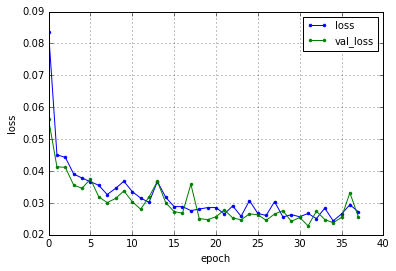

hiden node = 16
-edim=16-Window=4096-Overlap=32-Adagrad
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.0904 - val_loss: 0.0638
Epoch 2/50
3s - loss: 0.0580 - val_loss: 0.0502
Epoch 3/50
3s - loss: 0.0504 - val_loss: 0.0449
Epoch 4/50
2s - loss: 0.0450 - val_loss: 0.0433
Epoch 5/50
2s - loss: 0.0419 - val_loss: 0.0373
Epoch 6/50
2s - loss: 0.0388 - val_loss: 0.0353
Epoch 7/50
2s - loss: 0.0379 - val_loss: 0.0376
Epoch 8/50
3s - loss: 0.0359 - val_loss: 0.0341
Epoch 9/50
3s - loss: 0.0350 - val_loss: 0.0346
Epoch 10/50
2s - loss: 0.0338 - val_loss: 0.0349
Epoch 11/50
3s - loss: 0.0334 - val_loss: 0.0402
Epoch 12/50
3s - loss: 0.0327 - val_loss: 0.0297
Epoch 13/50
3s - loss: 0.0315 - val_loss: 0.0319
Epoch 14/50
2s - loss: 0.0310 - val_loss: 0.0290
Epoch 15/50
3s - loss: 0.0309 - val_loss: 0.0289
Epoch 16/50
2s - loss: 0.0301 - val_loss: 0.0349
Epoch 17/50
4s - loss: 0.0300 - val_loss: 0.0277
Epoch 18/50
3s - loss: 0.0287 - val_loss: 0.0285
Epoch 19/50
3s - loss: 

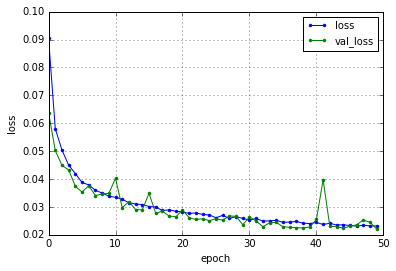

hiden node = 16
-edim=16-Window=4096-Overlap=32-RMSprop
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
3s - loss: 0.0929 - val_loss: 0.0547
Epoch 2/50
2s - loss: 0.0615 - val_loss: 0.0570
Epoch 3/50
3s - loss: 0.0565 - val_loss: 0.0466
Epoch 4/50
2s - loss: 0.0564 - val_loss: 0.0488
Epoch 5/50
2s - loss: 0.0555 - val_loss: 0.0581
Epoch 6/50
2s - loss: 0.0527 - val_loss: 0.0627
Epoch 7/50
3s - loss: 0.0503 - val_loss: 0.0552
Epoch 8/50
3s - loss: 0.0491 - val_loss: 0.0467
Epoch 9/50
3s - loss: 0.0486 - val_loss: 0.0415
Epoch 10/50
2s - loss: 0.0467 - val_loss: 0.0574
Epoch 11/50
2s - loss: 0.0459 - val_loss: 0.0575
Epoch 12/50
2s - loss: 0.0455 - val_loss: 0.0435
Epoch 13/50
2s - loss: 0.0451 - val_loss: 0.0368
Epoch 14/50
3s - loss: 0.0447 - val_loss: 0.0424
Epoch 15/50
3s - loss: 0.0434 - val_loss: 0.0515
Epoch 16/50
3s - loss: 0.0430 - val_loss: 0.0408
Epoch 17/50
3s - loss: 0.0426 - val_loss: 0.0363
Epoch 18/50
3s - loss: 0.0424 - val_loss: 0.0419
Epoch 19/50
3s - loss: 

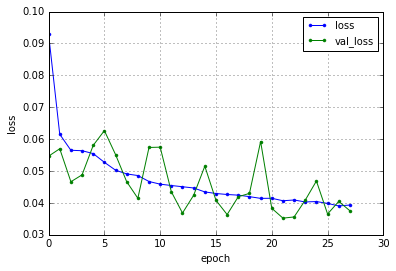

hiden node = 16
-edim=16-Window=4096-Overlap=32-Nadam
Train on 7833 samples, validate on 7833 samples
Epoch 1/50
4s - loss: 0.1015 - val_loss: 0.0650
Epoch 2/50
2s - loss: 0.0708 - val_loss: 0.0640
Epoch 3/50
2s - loss: 0.0643 - val_loss: 0.0630
Epoch 4/50
2s - loss: 0.0587 - val_loss: 0.0548
Epoch 5/50
2s - loss: 0.0591 - val_loss: 0.0590
Epoch 6/50
2s - loss: 0.0568 - val_loss: 0.0555
Epoch 7/50
3s - loss: 0.0577 - val_loss: 0.0605
Epoch 8/50
3s - loss: 0.0543 - val_loss: 0.0548
Epoch 9/50
2s - loss: 0.0520 - val_loss: 0.0483
Epoch 10/50
2s - loss: 0.0491 - val_loss: 0.0500
Epoch 11/50
2s - loss: 0.0477 - val_loss: 0.0465
Epoch 12/50
2s - loss: 0.0456 - val_loss: 0.0435
Epoch 13/50
2s - loss: 0.0471 - val_loss: 0.0460
Epoch 14/50
2s - loss: 0.0443 - val_loss: 0.0454
Epoch 15/50
2s - loss: 0.0455 - val_loss: 0.0418
Epoch 16/50
2s - loss: 0.0446 - val_loss: 0.0456
Epoch 17/50
2s - loss: 0.0428 - val_loss: 0.0407
Epoch 18/50
2s - loss: 0.0445 - val_loss: 0.0452
Epoch 19/50
2s - loss: 0.

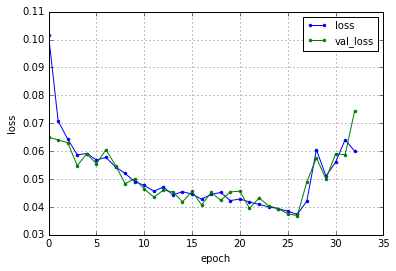

In [8]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    w=window.Window()
    w.SetData(Axis,dic[Axis])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))
    
    for opt,optName in zip(optimizers,optimArray):
        print "hiden node = "+str(encoding_dim)
        CommonName='-edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+optName
        print CommonName
        SaveFileNameEncord=DataName+'_encoded'+CommonName
        SaveFileNameDecord=DataName+'_decoded'+CommonName
        SaveFileNameNet=DataName+'_net'+CommonName
        SaveFileNameTrain=DataName+'_train'+CommonName
        SaveFileNameTest=DataName+'_test'+CommonName
        SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

        window_test=windoW
        window_train=windoW
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
        processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
        shapeNum=windoW.shape[1]

        # this is our input placeholder
        input_img = Input(shape=(shapeNum,))
        # "encoded" is the encoded representation of the input
        encoded = Dense(encoding_dim, activation='tanh')(input_img)
        # "decoded" is the lossy reconstruction of the input
        decoded = Dense(shapeNum, activation='linear')(encoded)

        # this model maps an input to its reconstruction
        autoencoder = Model(input=input_img, output=decoded)

        # this model maps an input to its encoded representation
        encoder = Model(input=input_img, output=encoded)

        # create a placeholder for an encoded (32-dimensional) input
        encoded_input = Input(shape=(encoding_dim,))
        # retrieve the last layer of the autoencoder model
        decoder_layer = autoencoder.layers[-1]
        # create the decoder model
        decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

        autoencoder.compile(optimizer=opt(), loss='mse')
        plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        hist = autoencoder.fit(window_train, window_train,
                        nb_epoch=50,
                        verbose=2,
                        batch_size=32,
                        shuffle=True,
                        validation_data=(window_test, window_test),
                        callbacks=[early_stopping])
        time.sleep(0.1)
        encoded_imgs = encoder.predict(window_test)
        decoded_imgs = decoder.predict(encoded_imgs)

        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
        processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

        # save model and wights
        json_string = encoder.to_json()
        open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
        encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

        json_string = decoder.to_json()
        open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
        decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

        json_string = autoencoder.to_json()
        open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
        autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

        # plot loss
        loss = hist.history['loss']
        val_loss = hist.history['val_loss']

        nb_epoch = len(loss)
        plt.plot(range(nb_epoch), loss, marker='.', label='loss')
        plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
        plt.legend(loc='best', fontsize=10)
        plt.grid()
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.savefig(SaveFileNameGlaph)
        plt.show()

In [9]:
print "finish"

finish
